# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [17]:
# 1. Load and check the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the weather dataset
df = pd.read_csv('Summary of Weather.csv')

# Show the first 10 rows
print(df.head(10))

# Show all columns
print('Columns:', list(df.columns))

# Show basic info and missing values
df.info()
print('Missing values per column:')
print(df.isnull().sum())

     STA       Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001   1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001   1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001   1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001   1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001   1942-7-5      0          NaN  26.666667  21.666667  24.444444   
5  10001   1942-7-6      0          NaN  26.666667  21.666667  24.444444   
6  10001   1942-7-7      T          NaN  28.333333  22.777778  25.555556   
7  10001   1942-7-8  3.556          NaN  26.666667  22.222222  24.444444   
8  10001   1942-7-9      T          NaN  27.222222  22.777778  25.000000   
9  10001  1942-7-10  3.556          NaN  25.555556  21.666667  23.333333   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1  

/var/folders/5y/r4rxk79n0_l34rlpdd9txll00000gn/T/ipykernel_81768/522492020.py:9: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


## 2. Clean the dataset, drop variables

/var/folders/5y/r4rxk79n0_l34rlpdd9txll00000gn/T/ipykernel_81768/2542008326.py:6: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


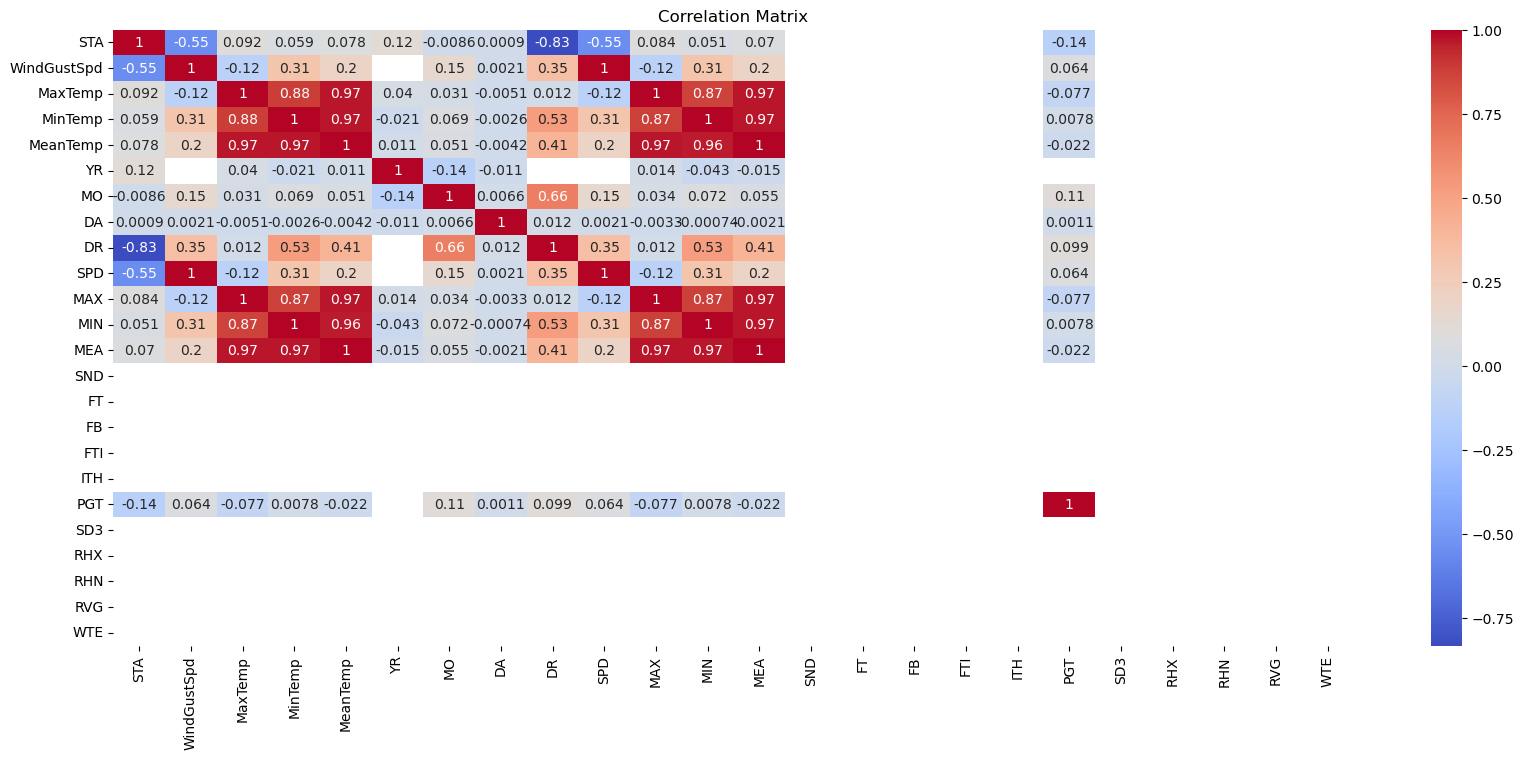

MinTemp        1.000000
MIN            1.000000
MEA            0.966441
MeanTemp       0.965425
MaxTemp        0.878384
MAX            0.872096
DR             0.525019
WindGustSpd    0.311690
SPD            0.311690
MO             0.069078
STA            0.059319
PGT            0.007828
DA            -0.002576
YR            -0.020733
SND                 NaN
FT                  NaN
FB                  NaN
FTI                 NaN
ITH                 NaN
SD3                 NaN
RHX                 NaN
RHN                 NaN
RVG                 NaN
WTE                 NaN
Name: MinTemp, dtype: float64
Remaining columns: ['Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather', 'PRCP', 'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'PGT']


In [18]:
# 2. Clean the dataset, drop variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Summary of Weather.csv')
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr['MinTemp'].sort_values(ascending=False))

drop_cols = ['STA','YR','MO','DA','SND','FT','FB','FTI','ITH','TSHDSBRSGF','SD3','RHX','RHN','RVG','WTE']
df_clean = df.drop(columns=drop_cols)

print('Remaining columns:', list(df_clean.columns))


## 3. Select the feature(s) for the model, and explain the reason

In [19]:
# 3. Select the feature(s) for the model, and explain the reason
# Select features with highest correlation to MinTemp (excluding MinTemp itself)
correlations = df_clean.corr(numeric_only=True)['MinTemp'].drop('MinTemp')
selected_features = correlations[correlations.abs() > 0.3].index.tolist()
print('Selected features:', selected_features)

# Example: Use MaxTemp and MeanTemp as predictors (adjust based on actual correlation)
X = df_clean[selected_features]
y = df_clean['MinTemp']

Selected features: ['WindGustSpd', 'MaxTemp', 'MeanTemp', 'DR', 'SPD', 'MAX', 'MIN', 'MEA']


## 4. Split the dataset (80% for training, 20% for testing)

In [20]:
# 4. Split the dataset (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])

Training set size: 95232
Test set size: 23808


## 5. Choose the algorithm, train and test the model

In [22]:
# 5. Choose the algorithm, train and test the model
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predict on test set
y_pred = model.predict(X_test_imputed)

## 6. Evaluate and Visualize model Performance

R²: 0.998
RMSE: 0.403


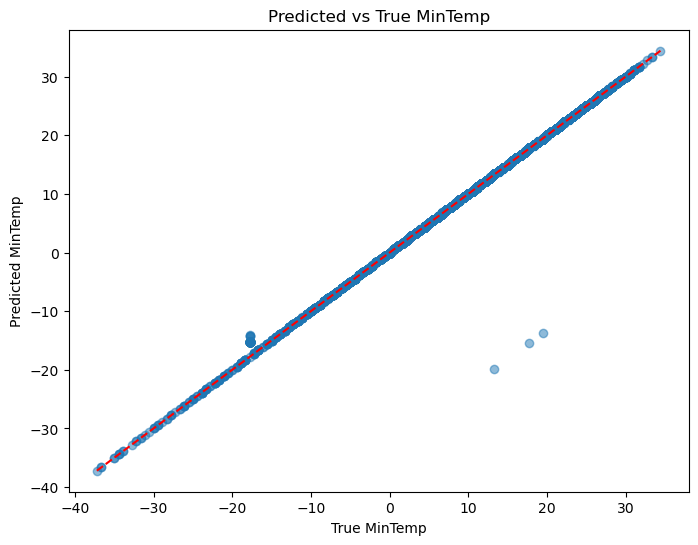

In [23]:
# 6. Evaluate and Visualize model Performance
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

# Plot predicted vs true values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True MinTemp')
plt.ylabel('Predicted MinTemp')
plt.title('Predicted vs True MinTemp')
plt.show()

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [24]:
print(f'R² value: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

# Explanation:
# The R² value (coefficient of determination) is 0.998, which means the model explains almost all the variance in the minimum temperature.
# The RMSE (root mean squared error) is 0.403, indicating that the average prediction error is very low.
# Together, these metrics show that the model has excellent predictive performance for minimum temperature.

R² value: 0.998
RMSE: 0.403


## 8. Discuss the model performance based on the plot

In [ ]:
# The scatter plot of predicted vs true MinTemp values shows that most points lie very close to the diagonal line,
# indicating that the model's predictions are highly accurate. There is minimal spread around the line,
# which means the errors are small and there is no obvious pattern of bias. This visual evidence,
# combined with the high R² and low RMSE, confirms that the linear regression model performs extremely well
# in predicting minimum temperature from the selected weather features.